In [2]:
import pandas as pd
import numpy as np
from helpers import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from IPython.display import display
from geopy.distance import geodesic
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
%load_ext autoreload
%autoreload 2

In [3]:
beers = pd.read_csv("dataset/FilteredData/beers.csv")
breweries = pd.read_csv("dataset/FilteredData/breweries.csv")
ratings = pd.read_csv("dataset/FilteredData/ratings.csv", dtype = {'user_id': str})
users = pd.read_csv("dataset/FilteredData/users.csv", dtype = {'user_id': str})

STYLE MOST CONSUMED BY YEAR - ONLY 1

In [4]:
all_years_list = sorted(ratings['year'].unique())
style_popularities_by_year = pd.DataFrame()
for year in all_years_list:
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = False)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_most_popular = location_style_groupedby_loc['popularity_percentage'].idxmax()
    most_popular_styles_by_location = location_style.loc[idx_most_popular]
    most_popular_styles_by_location = most_popular_styles_by_location[['location', 'style']]
    most_popular_styles_by_location.set_index('location', inplace = True)
    most_popular_styles_by_location = most_popular_styles_by_location.rename(columns = {'style': str(year)})
    style_popularities_by_year = pd.concat([style_popularities_by_year, most_popular_styles_by_location], axis = 1)

style_popularities_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),American Pale Ale,American Pale Ale,India Pale Ale (IPA)
Belgium,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Strong Ale,Belgian Ale,Belgian Ale,Belgian Ale,Imperial Stout
Brazil,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager
Canada,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,India Pale Ale (IPA),Pale Lager,American Pale Ale,Saison,Saison,Sour/Wild Ale
Croatia,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pilsener,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager,Pale Lager
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia",India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
"United States, Washington",India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
"United States, West Virginia",India Pale Ale (IPA),Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),Pale Lager,Saison


STYLE MOST CONSUMED BY YEAR - TOP 3

In [5]:
all_years_list = sorted(ratings['year'].unique())
style_popularities_by_year = pd.DataFrame()
for year in all_years_list:
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = False)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_most_popular = location_style_groupedby_loc.apply(lambda x: x.nlargest(3, 'popularity_percentage')).index.values
    idx_most_popular = [x[1] for x in idx_most_popular]
    most_popular_styles_by_location = location_style.loc[idx_most_popular]
    three_most_popular_styles_by_location = most_popular_styles_by_location.groupby('location')['style'].agg(list).to_frame()
    three_most_popular_styles_by_location = three_most_popular_styles_by_location.rename(columns = {'style': str(year)})
    style_popularities_by_year = pd.concat([style_popularities_by_year, three_most_popular_styles_by_location], axis = 1)
    
style_popularities_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,"[Pale Lager, Pilsener, Golden Ale/Blond Ale]","[Pale Lager, Pilsener, Golden Ale/Blond Ale]","[Pale Lager, Pilsener, Golden Ale/Blond Ale]","[Pale Lager, Golden Ale/Blond Ale, Pilsener]","[Pale Lager, Golden Ale/Blond Ale, American Pa...","[Pale Lager, American Pale Ale, Golden Ale/Blo...","[Pale Lager, American Pale Ale, Golden Ale/Blo...","[India Pale Ale (IPA), American Pale Ale, Pale...","[India Pale Ale (IPA), American Pale Ale, Pale...","[American Pale Ale, Pale Lager, Golden Ale/Blo...","[American Pale Ale, Pale Lager, Golden Ale/Blo...","[India Pale Ale (IPA), American Pale Ale, Pale..."
Belgium,"[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Pale Lager]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Strong Ale, Belgian Ale, Abbey Tripel]","[Belgian Ale, Belgian Strong Ale, Abbey Tripel]","[Belgian Ale, Belgian Strong Ale, Saison]","[Belgian Ale, Belgian Strong Ale, Abbey Tripel]","[Imperial Stout, Belgian Ale, Belgian Strong Ale]"
Brazil,"[Pale Lager, Pilsener, German Hefeweizen]","[Pale Lager, Belgian Strong Ale, Belgian Ale]","[Pale Lager, Pilsener, Belgian Strong Ale]","[Pale Lager, Pilsener, German Hefeweizen]","[Pale Lager, Belgian Strong Ale, Pilsener]","[Pale Lager, Belgian Strong Ale, Pilsener]","[Pale Lager, Belgian Strong Ale, Pilsener]","[Pale Lager, Belgian Strong Ale, German Hefewe...","[Pale Lager, Belgian Strong Ale, German Hefewe...","[Pale Lager, Belgian Strong Ale, German Hefewe...","[Pale Lager, Belgian Strong Ale, German Hefewe...","[Pale Lager, Belgian Strong Ale, Golden Ale/Bl..."
Canada,"[Pale Lager, Golden Ale/Blond Ale, Fruit Beer]","[Pale Lager, Golden Ale/Blond Ale, Pilsener]","[Pale Lager, India Pale Ale (IPA), Belgian Str...","[Pale Lager, Belgian Strong Ale, Golden Ale/Bl...","[Pale Lager, Belgian Strong Ale, Golden Ale/Bl...","[Pale Lager, Golden Ale/Blond Ale, Spice/Herb/...","[India Pale Ale (IPA), Pale Lager, Belgian Str...","[Pale Lager, American Pale Ale, Saison]","[American Pale Ale, Saison, Pale Lager]","[Saison, American Pale Ale, Sour/Wild Ale]","[Saison, Sour/Wild Ale, American Pale Ale]","[Sour/Wild Ale, Saison, Stout]"
Croatia,"[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Pilsener, Dunkel/Tmavý]","[Pilsener, Pale Lager, Dunkel/Tmavý]","[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Fruit Beer, Pilsener]","[Pale Lager, Pilsener, Fruit Beer]","[Pale Lager, Pilsener, German Hefeweizen]","[Pale Lager, Pilsener, American Pale Ale]","[Pale Lager, American Pale Ale, Pilsener]","[Pale Lager, American Pale Ale, Pilsener]"
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Porter, American Pale Ale]","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial IPA, Imperial ..."
"United States, Washington","[India Pale Ale (IPA), Imperial Stout, America...","[India Pale Ale (IPA), Porter, Imperial IPA]","[India Pale Ale (IPA), Imperial Stout, Belgian...","[India Pale Ale (IPA), Imperial IPA, Imperial ...","[India Pale Ale (IPA), Imperial IPA, American ...","[India Pale Ale (IPA), Imperial Stout, Imperia...","[India Pale Ale (IPA), Impe

STYLE HIGHEST RATED BY YEAR - ONLY 1

In [6]:
all_years_list = sorted(ratings['year'].unique())
style_ratings_by_year = pd.DataFrame()
for year in all_years_list:
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = True)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_highest_rated = location_style_groupedby_loc['z_score'].idxmax()
    highest_rated_styles_by_location = location_style.loc[idx_highest_rated]
    highest_rated_styles_by_location = highest_rated_styles_by_location[['location', 'style']]
    highest_rated_styles_by_location.set_index('location', inplace = True)
    highest_rated_styles_by_location = highest_rated_styles_by_location.rename(columns = {'style': str(year)})
    style_ratings_by_year = pd.concat([style_ratings_by_year, highest_rated_styles_by_location], axis = 1)

style_ratings_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Eisbock,Abt/Quadrupel,Lambic Style - Gueuze,Imperial Stout,Abt/Quadrupel
Belgium,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Lambic Style - Gueuze,Abt/Quadrupel,Imperial Stout,American Strong Ale,Imperial Stout,Imperial Stout,Imperial Stout
Brazil,German Hefeweizen,Abt/Quadrupel,Abt/Quadrupel,Belgian Strong Ale,Imperial Stout,Lambic Style - Fruit,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abbey Tripel
Canada,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Lambic Style - Gueuze,Abt/Quadrupel,Abt/Quadrupel,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze
Croatia,Belgian Strong Ale,Porter,Abt/Quadrupel,Imperial Stout,Imperial Stout,Imperial Stout,Imperial Stout,Imperial Stout,Imperial Stout,Imperial Stout,Abt/Quadrupel,Lambic Style - Fruit
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia",Abt/Quadrupel,Abt/Quadrupel,Sour Red/Brown,Lambic Style - Gueuze,Sour/Wild Ale,Lambic Style - Gueuze,Lambic Style - Unblended,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze
"United States, Washington",Abt/Quadrupel,Abt/Quadrupel,Lambic Style - Gueuze,Sour Red/Brown,Lambic Style - Unblended,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze,Lambic Style - Gueuze
"United States, West Virginia",Doppelbock,Imperial Stout,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Abt/Quadrupel,Imperial Stout,Lambic Style - Fruit,Imperial Stout,Abt/Quadrupel


STYLE HIGHEST RATED BY YEAR - TOP 3

In [7]:
all_years_list = sorted(ratings['year'].unique())
style_ratings_by_year = pd.DataFrame()
for year in all_years_list:
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = True)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_highest_rated = location_style_groupedby_loc.apply(lambda x: x.nlargest(3, 'z_score')).index.values
    idx_highest_rated = [x[1] for x in idx_highest_rated]
    highest_rated_styles_by_location = location_style.loc[idx_highest_rated]
    three_highest_rated_styles_by_location = highest_rated_styles_by_location.groupby('location')['style'].agg(list).to_frame()
    three_highest_rated_styles_by_location = three_highest_rated_styles_by_location.rename(columns = {'style': str(year)})
    style_ratings_by_year = pd.concat([style_ratings_by_year, three_highest_rated_styles_by_location], axis = 1)
    
style_ratings_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,"[Abt/Quadrupel, Imperial IPA, Lambic Style - G...","[Abt/Quadrupel, Imperial Stout, Imperial IPA]","[Abt/Quadrupel, Imperial IPA, Imperial Stout]","[Abt/Quadrupel, Eisbock, Imperial Stout]","[Abt/Quadrupel, Imperial Stout, Eisbock]","[Abt/Quadrupel, Imperial Stout, American Stron...","[Abt/Quadrupel, American Strong Ale , Lambic S...","[Eisbock, Abt/Quadrupel, Lambic Style - Gueuze]","[Abt/Quadrupel, Imperial Stout, Lambic Style -...","[Lambic Style - Gueuze, Weizen Bock, Abt/Quadr...","[Imperial Stout, Lambic Style - Gueuze, Abt/Qu...","[Abt/Quadrupel, Lambic Style - Gueuze, Old Ale]"
Belgium,"[Abt/Quadrupel, Lambic Style - Gueuze, Sour/Wi...","[Abt/Quadrupel, Imperial Stout, Imperial IPA]","[Abt/Quadrupel, Imperial Stout, Barley Wine]","[Abt/Quadrupel, Imperial Stout, Barley Wine]","[Abt/Quadrupel, Imperial Stout, Lambic Style -...","[Lambic Style - Gueuze, Abt/Quadrupel, Imperia...","[Abt/Quadrupel, Imperial Stout, American Stron...","[Imperial Stout, Eisbock, Lambic Style - Unble...","[American Strong Ale , Imperial Stout, Imperia...","[Imperial Stout, Lambic Style - Gueuze, Americ...","[Imperial Stout, Mead, Imperial IPA]","[Imperial Stout, Baltic Porter, American Stron..."
Brazil,"[German Hefeweizen, Pilsener, Pale Lager]","[Abt/Quadrupel, Barley Wine, Belgian Strong Ale]","[Abt/Quadrupel, Imperial Stout, Belgian Strong...","[Belgian Strong Ale, Abbey Tripel, India Pale ...","[Imperial Stout, Belgian Strong Ale, Lambic St...","[Lambic Style - Fruit, Porter, Barley Wine]","[Abt/Quadrupel, Old Ale, Abbey Tripel]","[Abt/Quadrupel, Sour/Wild Ale, Belgian Strong ...","[Abt/Quadrupel, Imperial Stout, Lambic Style -...","[Abt/Quadrupel, Imperial Stout, American Stron...","[Abt/Quadrupel, Imperial Stout, Sour Red/Brown]","[Abbey Tripel, Belgian Strong Ale, Abt/Quadrupel]"
Canada,"[Abt/Quadrupel, Lambic Style - Unblended, Impe...","[Abt/Quadrupel, Lambic Style - Unblended, Impe...","[Abt/Quadrupel, Imperial Stout, Sour/Wild Ale]","[Abt/Quadrupel, Lambic Style - Gueuze, Imperia...","[Abt/Quadrupel, Grodziskie/Gose/Lichtenhainer,...","[Abt/Quadrupel, Lambic Style - Unblended, Lamb...","[Lambic Style - Gueuze, Abt/Quadrupel, Lambic ...","[Abt/Quadrupel, Lambic Style - Gueuze, Imperia...","[Abt/Quadrupel, Imperial Stout, Lambic Style -...","[Lambic Style - Gueuze, Imperial Stout, Abt/Qu...","[Lambic Style - Gueuze, Imperial Stout, Lambic...","[Lambic Style - Gueuze, Lambic Style - Unblend..."
Croatia,"[Belgian Strong Ale, Abbey Tripel, Abbey Dubbel]","[Porter, Belgian Strong Ale, Abbey Dubbel]","[Abt/Quadrupel, Imperial Stout, Baltic Porter]","[Imperial Stout, India Pale Ale (IPA), Belgian...","[Imperial Stout, India Pale Ale (IPA), Weizen ...","[Imperial Stout, Imperial IPA, Barley Wine]","[Imperial Stout, Barley Wine, Imperial IPA]","[Imperial Stout, Abbey Dubbel, Abbey Tripel]","[Imperial Stout, Weizen Bock, Abt/Quadrupel]","[Imperial Stout, Black IPA, Abt/Quadrupel]","[Abt/Quadrupel, Imperial Stout, American Stron...","[Lambic Style - Fruit, Imperial Stout, Lambic ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia","[Abt/Quadrupel, Sour/Wild Ale, Eisbock]","[Abt/Quadrupel, Sour/Wild Ale, Imperial Stout]","[Sour Red/Brown, Abt/Quadrupel, Lambic Style -...","[Lambic Style - Gueuze, Sour Red/Brown, Imperi...","[Sour/Wild Ale, Weizen Bock, Lambic Style - Un...","[Lambic Style - Gueuze, Eisbock, Abt/Quadrupel]","[Lambic Style - Unblended, Lambic Style - Gueu...","[Lambic Style - Gueuze, Imperial Stout, Eisbock]","[Lambic Style - Gueuze, Lambic Style - Fruit, ...","[Lambic Style - Gueuze, Imperial Stout, Lambic...","[Lambic Style - Gueuze, Lambic Style - Fruit, ...","[Lambic Style - Gueuze, Lambic Style - Unblend..."
"United States, Washington","[Abt/Quadrupel, Imperial Stout, Eisbock]","[Abt/Quadrupel, Imperial Stout, Eisbock]","[Lambic Style - Gueuze, Sour Red/Brown, Sour/W...","[Sour Red/Brown, Lambic Style - U

BREWERY LOCATION MOST CONSUMED BY YEAR

In [8]:
all_years_list = sorted(ratings['year'].unique())
bc_popularities_by_year = pd.DataFrame()
for year in all_years_list:
    location_bc = location_brewery_country_stats(ratings.copy(), users.copy(), breweries.copy(), year, loc_brewery_threshold = 20, rating_flag = False)
    location_bc_gb_loc = location_bc.groupby('location')
    idx_most_popular = location_bc_gb_loc['popularity_percentage'].idxmax()
    most_popular_bc_by_location = location_bc.loc[idx_most_popular]
    most_popular_bc_by_location = most_popular_bc_by_location[['location', 'brewery_location']]
    most_popular_bc_by_location.set_index('location', inplace = True)
    most_popular_bc_by_location = most_popular_bc_by_location.rename(columns = {'brewery_location': str(year)})
    bc_popularities_by_year = pd.concat([bc_popularities_by_year, most_popular_bc_by_location], axis = 1)
    
bc_popularities_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia
Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium
Brazil,Brazil,Belgium,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil
Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada
Croatia,Belgium,Belgium,Germany,Czech Republic,Germany,Germany,Germany,Germany,Germany,Germany,Croatia,Croatia
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, Virginia","United States, Virginia","United States, Virginia","United States, Virginia"
"United States, Washington","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, Washington","United States, Washington","United States, Washington"
"United States, West Virginia","United States, Pennsylvania","United States, Pennsylvania","United States, California","United States, New York","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, California","United States, Ohio"


BREWERY LOCATION HIGHEST RATED BY YEAR

In [9]:
all_years_list = sorted(ratings['year'].unique())
bc_ratings_by_year = pd.DataFrame()
for year in all_years_list:
    location_bc = location_brewery_country_stats(ratings.copy(), users.copy(), breweries.copy(), year, loc_brewery_threshold = 20, rating_flag = True)
    location_bc_gb_loc = location_bc.groupby('location')
    idx_highest_rated = location_bc_gb_loc['z_score'].idxmax()
    highest_rated_bc_by_location = location_bc.loc[idx_highest_rated]
    highest_rated_bc_by_location = highest_rated_bc_by_location[['location', 'brewery_location']]
    highest_rated_bc_by_location.set_index('location', inplace=True)
    highest_rated_bc_by_location = highest_rated_bc_by_location.rename(columns={'brewery_location': str(year)})
    bc_ratings_by_year = pd.concat([bc_ratings_by_year, highest_rated_bc_by_location], axis=1)
    
bc_ratings_by_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,"United States, California","United States, Colorado","United States, Oregon",Norway,Norway,"United States, Michigan","United States, Alaska",Norway,"United States, Vermont",Norway,"United States, Oklahoma","United States, Massachusetts"
Belgium,"United States, California","United States, California","United States, Michigan","United States, Georgia","United States, Oregon",Norway,"United States, Illinois","United States, Vermont","United States, Iowa","United States, Vermont","United States, South Carolina","United States, Ohio"
Brazil,Germany,Canada,"United States, California",Belgium,Belgium,"United States, California",Belgium,"United States, Indiana","United States, Florida","United States, Illinois","United States, Florida","United States, Massachusetts"
Canada,"United States, Alaska",Norway,Norway,Norway,Norway,Norway,"United States, Indiana","United States, Iowa","United States, Vermont","United States, Oklahoma","United States, Iowa","United States, Oklahoma"
Croatia,Belgium,Belgium,Belgium,England,Scotland,Sweden,Belgium,Scotland,Norway,Norway,Norway,"United States, Oregon"
...,...,...,...,...,...,...,...,...,...,...,...,...
"United States, Virginia","United States, Connecticut","United States, Connecticut",Norway,Norway,"United States, Minnesota","United States, Alaska","United States, Alaska","United States, Iowa","United States, Iowa",Norway,Switzerland,"United States, Oklahoma"
"United States, Washington","United States, Connecticut",Norway,Norway,Norway,"United States, Indiana",Switzerland,Belgium,"United States, Iowa","United States, Iowa","United States, Vermont","United States, Iowa","United States, Wyoming"
"United States, West Virginia","United States, Ohio",Belgium,"United States, Michigan",Belgium,Belgium,Belgium,"United States, Michigan",Belgium,Belgium,"United States, Indiana",Belgium,"United States, Oregon"


GLOBAL TRENDS

STYLE MOST CONSUMED BY YEAR --- GLOBAL

In [10]:
all_years_list = sorted(ratings['year'].unique())
global_style_popularity_points_by_year = pd.DataFrame()
points = [12, 10, 8, 7, 6, 5, 4, 3, 2, 1]
for year in all_years_list:
    style_popularity_points_dict = {key: 0 for key in ratings['style'].unique().tolist()}
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = False, global_flag = True)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_10_most_popular = location_style_groupedby_loc['popularity_percentage'].nlargest(10).index.get_level_values(1)
    most_popular_styles_by_location = location_style.loc[idx_10_most_popular]
    
    point_idx = 0
    prev_location = most_popular_styles_by_location.iloc[0]['location']
    for index, row in most_popular_styles_by_location.iterrows():
        location = row['location']
        if location != prev_location:
            point_idx = 0
            prev_location = location
        style_popularity_points_dict[row['style']] += points[point_idx]
        point_idx += 1
    global_style_popularity_points_by_year[str(year)] = style_popularity_points_dict

global_style_popularities_by_year = global_style_popularity_points_by_year.apply(lambda x: x.nlargest(10).index.tolist()).T
global_style_popularities_by_year_points = global_style_popularity_points_by_year.apply(lambda x: x.nlargest(10).tolist()).T
tuple_list = {column: list(zip(global_style_popularities_by_year[column], global_style_popularities_by_year_points[column])) for column in global_style_popularities_by_year.columns}
global_style_popularities_by_year = pd.DataFrame(tuple_list, index = global_style_popularities_by_year.index)

global_style_popularities_by_year.columns = ['1st Most Popular', '2nd Most Popular', '3rd Most Popular', '4th Most Popular', '5th Most Popular', '6th Most Popular', '7th Most Popular', '8th Most Popular', '9th Most Popular', '10th Most Popular']
global_style_popularities_by_year.index.name = 'Year'
global_style_popularities_by_year

,1st Most Popular,2nd Most Popular,3rd Most Popular,4th Most Popular,5th Most Popular,6th Most Popular,7th Most Popular,8th Most Popular,9th Most Popular,10th Most Popular
Year,,,,,,,,,,
2006,"(Pilsener, 117)","(Pale Lager, 106)","(Belgian Strong Ale, 82)","(German Hefeweizen, 69)","(Golden Ale/Blond Ale, 66)","(Belgian Ale, 63)","(Premium Bitter/ESB, 62)","(Porter, 58)","(Bitter, 56)","(Dunkel/Tmavý, 52)"
2007,"(Pale Lager, 118)","(Pilsener, 102)","(Belgian Strong Ale, 78)","(Golden Ale/Blond Ale, 74)","(Bitter, 66)","(Porter, 66)","(German Hefeweizen, 66)","(India Pale Ale (IPA), 65)","(Belgian Ale, 64)","(Fruit Beer, 48)"
2008,"(Pale Lager, 108)","(Pilsener, 100)","(Belgian Strong Ale, 86)","(Imperial Stout, 75)","(Golden Ale/Blond Ale, 71)","(India Pale Ale (IPA), 68)","(Bitter, 66)","(Porter, 63)","(Belgian Ale, 60)","(Fruit Beer, 55)"
2009,"(Pilsener, 108)","(India Pale Ale (IPA), 82)","(Pale Lager, 80)","(Belgian Strong Ale, 64)","(Porter, 62)","(Belgian Ale, 62)","(Imperial Stout, 61)","(Golden Ale/Blond Ale, 53)","(Premium Bitter/ESB, 49)","(American Pale Ale, 48)"
2010,"(Pale Lager, 136)","(Belgian Strong Ale, 81)","(Pilsener, 78)","(India Pale Ale (IPA), 76)","(Imperial Stout, 76)","(Porter, 66)","(Golden Ale/Blond Ale, 64)","(German Hefeweizen, 56)","(Bitter, 51)","(Imperial IPA, 50)"
2011,"(Pale Lager, 134)","(India Pale Ale (IPA), 100)","(Pilsener, 93)","(Imperial Stout, 85)","(Belgian Strong Ale, 84)","(Porter, 66)","(Golden Ale/Blond Ale, 65)","(German Hefeweizen, 64)","(Bitter, 60)","(Belgian Ale, 59)"
2012,"(India Pale Ale (IPA), 112)","(Pale Lager, 104)","(Imperial Stout, 93)","(American Pale Ale, 88)","(Belgian Strong Ale, 84)","(Pilsener, 78)","(Belgian Ale, 78)","(Porter, 77)","(Imperial IPA, 58)","(Golden Ale/Blond Ale, 51)"
2013,"(India Pale Ale (IPA), 116)","(American Pale Ale, 109)","(Pale Lager, 95)","(Imperial Stout, 93)","(Pilsener, 83)","(Belgian Strong Ale, 77)","(Porter, 67)","(Golden Ale/Blond Ale, 59)","(Belgian Ale, 58)","(Imperial IPA, 50)"
2014,"(India Pale Ale (IPA), 154)","(American Pale Ale, 110)","(Pale Lager, 99)","(Imperial Stout, 79)","(Belgian Strong Ale, 74)","(Porter, 69)","(Golden Ale/Blond Ale, 64)","(Saison, 63)","(Belgian Ale, 63)","(Pilsener, 59)"


STYLE HIGHEST RATED BY YEAR --- GLOBAL

In [11]:
all_years_list = sorted(ratings['year'].unique())
global_style_rating_points_by_year = pd.DataFrame()
points = [12, 10, 8, 7, 6, 5, 4, 3, 2, 1]
for year in all_years_list:
    style_rating_points_dict = {key: 0 for key in ratings['style'].unique().tolist()}
    location_style = location_style_stats(ratings.copy(), users.copy(), year, loc_style_threshold = 10, rating_flag = True, global_flag = True)
    location_style_groupedby_loc = location_style.groupby('location')
    idx_10_highest_rated = location_style_groupedby_loc['z_score'].nlargest(10).index.get_level_values(1)
    highest_rated_styles_by_location = location_style.loc[idx_10_highest_rated]
    
    point_idx = 0
    prev_location = highest_rated_styles_by_location.iloc[0]['location']
    for index, row in highest_rated_styles_by_location.iterrows():
        location = row['location']
        if location != prev_location:
            point_idx = 0
            prev_location = location
        style_rating_points_dict[row['style']] += points[point_idx]
        point_idx += 1
    global_style_rating_points_by_year[str(year)] = style_rating_points_dict

global_style_highest_rated_by_year = global_style_rating_points_by_year.apply(lambda x: x.nlargest(10).index.tolist()).T
global_style_highest_rated_by_year_points = global_style_rating_points_by_year.apply(lambda x: x.nlargest(10).tolist()).T

tuple_list = {column: list(zip(global_style_highest_rated_by_year[column], global_style_highest_rated_by_year_points[column])) for column in global_style_highest_rated_by_year.columns}
global_style_highest_rated_by_year = pd.DataFrame(tuple_list, index = global_style_highest_rated_by_year.index)

global_style_highest_rated_by_year.columns = ['1st Highest Rated', '2nd Highest Rated', '3rd Highest Rated', '4th Highest Rated', '5th Highest Rated', '6th Highest Rated', '7th Highest Rated', '8th Highest Rated', '9th Highest Rated', '10th Highest Rated']
global_style_highest_rated_by_year.index.name = 'Year'
global_style_highest_rated_by_year

,1st Highest Rated,2nd Highest Rated,3rd Highest Rated,4th Highest Rated,5th Highest Rated,6th Highest Rated,7th Highest Rated,8th Highest Rated,9th Highest Rated,10th Highest Rated
Year,,,,,,,,,,
2006,"(Imperial Stout, 112)","(Abt/Quadrupel, 111)","(Belgian Strong Ale, 108)","(Imperial IPA, 82)","(Lambic Style - Gueuze, 57)","(Baltic Porter, 47)","(Abbey Tripel, 39)","(Sour/Wild Ale, 38)","(Belgian Ale, 37)","(American Strong Ale , 37)"
2007,"(Abt/Quadrupel, 158)","(Imperial Stout, 154)","(Belgian Strong Ale, 110)","(Imperial IPA, 85)","(Barley Wine, 57)","(Sour Red/Brown, 52)","(Porter, 51)","(American Strong Ale , 50)","(Sour/Wild Ale, 40)","(Lambic Style - Gueuze, 40)"
2008,"(Imperial Stout, 204)","(Abt/Quadrupel, 148)","(Imperial IPA, 119)","(Belgian Strong Ale, 99)","(Sour/Wild Ale, 79)","(Barley Wine, 72)","(Lambic Style - Gueuze, 55)","(Abbey Tripel, 52)","(India Pale Ale (IPA), 45)","(Baltic Porter, 45)"
2009,"(Imperial Stout, 188)","(Abt/Quadrupel, 141)","(Imperial IPA, 100)","(Sour Red/Brown, 79)","(Barley Wine, 72)","(Belgian Strong Ale, 65)","(Sour/Wild Ale, 58)","(Lambic Style - Gueuze, 58)","(American Strong Ale , 51)","(India Pale Ale (IPA), 45)"
2010,"(Imperial Stout, 204)","(Abt/Quadrupel, 156)","(Imperial IPA, 81)","(Lambic Style - Unblended, 81)","(Belgian Strong Ale, 63)","(American Strong Ale , 63)","(Sour Red/Brown, 52)","(Lambic Style - Gueuze, 49)","(Abbey Tripel, 47)","(Black IPA, 45)"
2011,"(Imperial Stout, 196)","(Abt/Quadrupel, 152)","(Imperial IPA, 132)","(Lambic Style - Gueuze, 93)","(Lambic Style - Unblended, 67)","(American Strong Ale , 58)","(Barley Wine, 56)","(Belgian Strong Ale, 48)","(Sour/Wild Ale, 47)","(Black IPA, 43)"
2012,"(Imperial Stout, 193)","(Abt/Quadrupel, 179)","(Imperial IPA, 137)","(Lambic Style - Gueuze, 118)","(Black IPA, 72)","(American Strong Ale , 72)","(Sour/Wild Ale, 60)","(Barley Wine, 53)","(Sour Red/Brown, 48)","(Lambic Style - Unblended, 46)"
2013,"(Imperial Stout, 213)","(Abt/Quadrupel, 209)","(Imperial IPA, 106)","(Lambic Style - Gueuze, 103)","(American Strong Ale , 73)","(Eisbock, 67)","(Black IPA, 58)","(Sour/Wild Ale, 53)","(Barley Wine, 48)","(Lambic Style - Unblended, 48)"
2014,"(Imperial Stout, 244)","(Abt/Quadrupel, 185)","(Lambic Style - Gueuze, 117)","(Imperial IPA, 113)","(American Strong Ale , 88)","(Barley Wine, 70)","(Black IPA, 60)","(Lambic Style - Unblended, 60)","(Eisbock, 58)","(Sour/Wild Ale, 57)"


BREWERY LOCATION MOST CONSUMED BY YEAR --- GLOBAL

In [12]:
all_years_list = sorted(ratings['year'].unique())
global_brewery_popularity_points_by_year = pd.DataFrame()
points = [12, 10, 8, 7, 6, 5, 4, 3, 2, 1]
for year in all_years_list:
    brewery_popularity_points_dict = {key: 0 for key in breweries['location'].unique().tolist()}
    location_bc = location_brewery_country_stats(ratings.copy(), users.copy(), breweries.copy(), year, loc_brewery_threshold = 20, rating_flag = False, global_flag = True)
    location_bc_groupedby_loc = location_bc.groupby('location')
    idx_10_most_popular = location_bc_groupedby_loc['popularity_percentage'].nlargest(10).index.get_level_values(1)
    most_popular_breweries_by_location = location_bc.loc[idx_10_most_popular]
    
    point_idx = 0
    prev_location = most_popular_breweries_by_location.iloc[0]['location']
    for index, row in most_popular_breweries_by_location.iterrows():
        location = row['location']
        if location != prev_location:
            point_idx = 0
            prev_location = location
        brewery_popularity_points_dict[row['brewery_location']] += points[point_idx]
        point_idx += 1
    global_brewery_popularity_points_by_year[str(year)] = brewery_popularity_points_dict

global_brewery_popularities_by_year = global_brewery_popularity_points_by_year.apply(lambda x: x.nlargest(10).index.tolist()).T
global_brewery_popularities_by_year_points = global_brewery_popularity_points_by_year.apply(lambda x: x.nlargest(10).tolist()).T

tuple_list = {column: list(zip(global_brewery_popularities_by_year[column], global_brewery_popularities_by_year_points[column])) for column in global_brewery_popularities_by_year.columns}
global_brewery_popularities_by_year = pd.DataFrame(tuple_list, index = global_brewery_popularities_by_year.index)

global_brewery_popularities_by_year.columns = ['1st Most Popular', '2nd Most Popular', '3rd Most Popular', '4th Most Popular', '5th Most Popular', '6th Most Popular', '7th Most Popular', '8th Most Popular', '9th Most Popular', '10th Most Popular']
global_brewery_popularities_by_year.index.name = 'Year'
global_brewery_popularities_by_year

,1st Most Popular,2nd Most Popular,3rd Most Popular,4th Most Popular,5th Most Popular,6th Most Popular,7th Most Popular,8th Most Popular,9th Most Popular,10th Most Popular
Year,,,,,,,,,,
2006,"(Belgium, 104)","(England, 90)","(Germany, 82)","(Netherlands, 53)","(Scotland, 51)","(Czech Republic, 50)","(United States, California, 45)","(France, 40)","(Denmark, 36)","(Sweden, 35)"
2007,"(Germany, 90)","(Belgium, 80)","(England, 78)","(Denmark, 57)","(United States, California, 57)","(Sweden, 49)","(Czech Republic, 45)","(Netherlands, 45)","(Scotland, 44)","(United States, New York, 43)"
2008,"(England, 98)","(Germany, 86)","(Belgium, 80)","(Denmark, 70)","(United States, California, 57)","(Netherlands, 50)","(United States, New York, 44)","(Czech Republic, 43)","(United States, Colorado, 43)","(Scotland, 39)"
2009,"(Germany, 80)","(United States, California, 68)","(United States, New York, 60)","(Belgium, 58)","(England, 56)","(Czech Republic, 51)","(Denmark, 45)","(Sweden, 42)","(United States, Maryland, 38)","(Scotland, 37)"
2010,"(Belgium, 76)","(United States, California, 74)","(Germany, 68)","(England, 68)","(United States, New York, 54)","(Czech Republic, 45)","(Norway, 44)","(Denmark, 42)","(United States, Colorado, 39)","(Canada, 36)"
2011,"(Belgium, 100)","(United States, California, 74)","(Germany, 73)","(England, 60)","(Czech Republic, 51)","(United States, New York, 50)","(Denmark, 46)","(Scotland, 45)","(United States, Maryland, 41)","(Netherlands, 40)"
2012,"(Belgium, 86)","(Germany, 84)","(United States, California, 69)","(England, 58)","(Denmark, 57)","(United States, New York, 57)","(Netherlands, 46)","(Scotland, 43)","(Japan, 34)","(Czech Republic, 34)"
2013,"(Belgium, 86)","(Germany, 78)","(United States, California, 62)","(Denmark, 57)","(England, 48)","(United States, New York, 46)","(Norway, 45)","(United States, Oregon, 45)","(Scotland, 41)","(Czech Republic, 40)"
2014,"(Belgium, 76)","(Germany, 62)","(United States, California, 61)","(Denmark, 55)","(Czech Republic, 54)","(England, 54)","(United States, New York, 44)","(Scotland, 42)","(Japan, 40)","(United States, Oregon, 39)"


BREWERY LOCATION HIGHEST RATED BY YEAR --- GLOBAL

In [13]:
all_years_list = sorted(ratings['year'].unique())
global_brewery_rating_points_by_year = pd.DataFrame()
points = [12, 10, 8, 7, 6, 5, 4, 3, 2, 1]
for year in all_years_list:
    brewery_rating_points_dict = {key: 0 for key in breweries['location'].unique().tolist()}
    location_bc = location_brewery_country_stats(ratings.copy(), users.copy(), breweries.copy(), year, loc_brewery_threshold = 20, rating_flag = True, global_flag = True)
    location_bc_groupedby_loc = location_bc.groupby('location')
    idx_10_highest_rated = location_bc_groupedby_loc['z_score'].nlargest(10).index.get_level_values(1)
    highest_rated_breweries_by_location = location_bc.loc[idx_10_highest_rated]
    
    point_idx = 0
    prev_location = highest_rated_breweries_by_location.iloc[0]['location']
    for index, row in highest_rated_breweries_by_location.iterrows():
        location = row['location']
        if location != prev_location:
            point_idx = 0
            prev_location = location
        brewery_rating_points_dict[row['brewery_location']] += points[point_idx]
        point_idx += 1
    global_brewery_rating_points_by_year[str(year)] = brewery_rating_points_dict

global_brewery_highest_rated_by_year = global_brewery_rating_points_by_year.apply(lambda x: x.nlargest(10).index.tolist()).T
global_brewery_highest_rated_by_year_points = global_brewery_rating_points_by_year.apply(lambda x: x.nlargest(10).tolist()).T

tuple_list = {column: list(zip(global_brewery_highest_rated_by_year[column], global_brewery_highest_rated_by_year_points[column])) for column in global_brewery_highest_rated_by_year.columns}
global_brewery_highest_rated_by_year = pd.DataFrame(tuple_list, index = global_brewery_highest_rated_by_year.index)

global_brewery_highest_rated_by_year.columns = ['1st Highest Rated', '2nd Highest Rated', '3rd Highest Rated', '4th Highest Rated', '5th Highest Rated', '6th Highest Rated', '7th Highest Rated', '8th Highest Rated', '9th Highest Rated', '10th Highest Rated']
global_brewery_highest_rated_by_year.index.name = 'Year'
global_brewery_highest_rated_by_year

,1st Highest Rated,2nd Highest Rated,3rd Highest Rated,4th Highest Rated,5th Highest Rated,6th Highest Rated,7th Highest Rated,8th Highest Rated,9th Highest Rated,10th Highest Rated
Year,,,,,,,,,,
2006,"(Belgium, 179)","(Germany, 97)","(United States, California, 79)","(England, 79)","(United States, Oregon, 65)","(Scotland, 61)","(United States, Colorado, 43)","(Denmark, 38)","(Canada, 34)","(United States, New York, 28)"
2007,"(Belgium, 178)","(United States, California, 104)","(Germany, 88)","(England, 86)","(Canada, 65)","(Scotland, 62)","(United States, New York, 54)","(United States, Colorado, 53)","(Norway, 47)","(United States, Ohio, 30)"
2008,"(Belgium, 182)","(United States, California, 129)","(England, 93)","(United States, Oregon, 86)","(Germany, 72)","(United States, Colorado, 57)","(United States, Ohio, 53)","(Canada, 52)","(Scotland, 47)","(United States, Michigan, 44)"
2009,"(United States, California, 178)","(Belgium, 130)","(United States, Oregon, 81)","(Norway, 72)","(England, 71)","(United States, Michigan, 59)","(United States, Ohio, 58)","(Scotland, 44)","(United States, Colorado, 43)","(Canada, 42)"
2010,"(United States, California, 134)","(Belgium, 130)","(Norway, 110)","(United States, Oregon, 80)","(England, 78)","(United States, Ohio, 75)","(United States, Michigan, 62)","(United States, New York, 59)","(Germany, 49)","(Scotland, 44)"
2011,"(United States, California, 152)","(Belgium, 136)","(Norway, 115)","(United States, Oregon, 77)","(United States, New York, 64)","(United States, Michigan, 60)","(England, 56)","(United States, Ohio, 46)","(United States, Colorado, 41)","(United States, Vermont, 40)"
2012,"(United States, California, 128)","(Belgium, 113)","(Norway, 98)","(United States, Ohio, 94)","(United States, Alaska, 77)","(United States, Michigan, 73)","(United States, Oregon, 70)","(United States, New York, 60)","(United States, Illinois, 59)","(United States, Vermont, 58)"
2013,"(United States, California, 136)","(United States, Alaska, 98)","(Norway, 93)","(Belgium, 87)","(United States, Vermont, 86)","(United States, Ohio, 65)","(United States, South Carolina, 58)","(United States, New York, 47)","(United States, Oregon, 47)","(United States, Oklahoma, 47)"
2014,"(United States, California, 117)","(United States, Vermont, 105)","(United States, Oklahoma, 101)","(Norway, 85)","(United States, Ohio, 85)","(United States, Oregon, 78)","(Belgium, 73)","(United States, Illinois, 70)","(United States, Alaska, 54)","(United States, Michigan, 54)"


SIMILARITY BETWEEN COUNTRIES
 - Compute the similarity of each country and the global trend
 - Similarity between each location pairs
 - Global average of similarity between each other (globally and within each group) --> see if evolves
 


In [171]:
def geocode_location(location_name):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(location_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None



In [17]:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

In [193]:
def compute_similarity_countries(df_ranking, jaccard_flag = True):
    all_years_list = sorted(df_ranking.columns.unique())
    countries = df_ranking.index.tolist()
    pairwise_similarity = pd.DataFrame()
    for year in all_years_list:
        similarities = []
        df_ranking_year = df_ranking[str(year)]
        for i in range(len(df_ranking_year)):
            for j in range(i+1, len(df_ranking_year)):
                if (jaccard_flag): 
                    similarity = jaccard(df_ranking_year.iloc[i],df_ranking_year.iloc[j])
                else: 
                    distance = geodesic(ll_dict[df_ranking_year.iloc[i]], ll_dict[df_ranking_year.iloc[j]]).kilometers
                    similarity = 1/(distance+1000)
                
                similarities.append((countries[i], countries[j], similarity))

        df_similarities = pd.DataFrame(similarities, columns=['Country 1', 'Country 2', 'Similarity - ' + str(year)])
        pairwise_similarity=pd.concat([pairwise_similarity, df_similarities], axis=1)
    
    pairwise_similarity = pairwise_similarity.T.drop_duplicates().T
    return pairwise_similarity

In [139]:

def compute_similarity_to_global (df_ranking, df_global, jaccard_flag = True):
    all_years_list = sorted(df_ranking.columns.unique())
    global_rank = df_global.apply(lambda row: row[:3].tolist(), axis=1)
    global_rank_values = [[t[0] for t in lst]for lst in global_rank]
    df_global_rank = pd.DataFrame({'year': all_years_list, 'values': global_rank_values})
    similarity_to_global = pd.DataFrame()
    countries = df_ranking.index.tolist()

    for year in all_years_list:
        similarities = []
        df_ranking_year = df_ranking[str(year)]
        global_r = df_global_rank[df_global_rank['year'] == year].values[0][1]
        for i in range(len(df_ranking_year)):
            if(jaccard_flag):
                similarity = jaccard(df_ranking_year.iloc[i],global_r)
            else: 
                distance = geodesic(ll_dict[df_ranking_year.iloc[i]], ll_dict[global_r]).kilometers
                similarity = 1/(distance+1)

            similarities.append((countries[i], similarity))
        df_similarities = pd.DataFrame(similarities, columns=['Country 1', 'Similarity - ' + str(year)])
        similarity_to_global = pd.concat([similarity_to_global, df_similarities], axis=1)
        

    similarity_to_global = similarity_to_global.T.drop_duplicates().T
    return similarity_to_global


In [114]:
style_similarity_ratings = compute_similarity_countries (style_ratings_by_year, jaccard_flag = True)

In [132]:
#Compute the mean jaccard distance for each year globally

def plot_similarity_evolution(df_similarity):
    similarity_columns = [col for col in df_similarity.columns if col.startswith('Similarity')]
    sns.pointplot(data=df_similarity[similarity_columns])
    plt.show()

    

/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

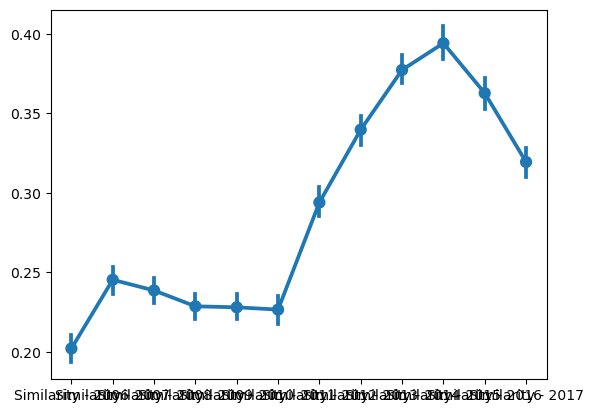

In [133]:
plot_similarity_evolution(style_similarity_ratings)

In [130]:
#Style popularity by year

style_similarity_popularity = compute_similarity_countries(style_popularities_by_year, jaccard_flag = True)

/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

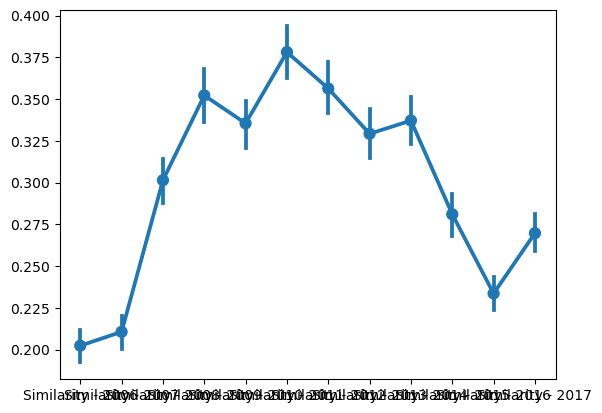

In [134]:
plot_similarity_evolution(style_similarity_popularity)

In [181]:
mean_global_similarity_popularity=compute_similarity_to_global (style_popularities_by_year, global_style_popularities_by_year, jaccard_flag = True)

/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

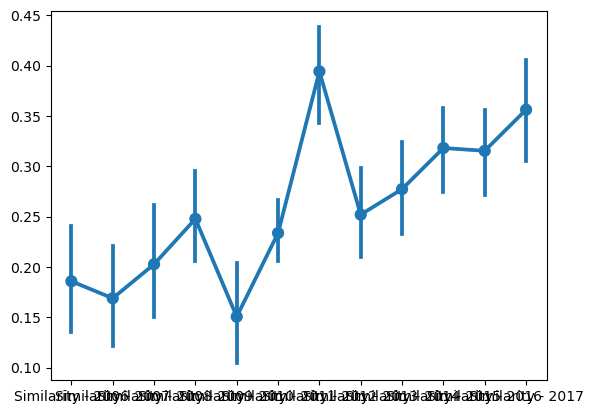

In [182]:
plot_similarity_evolution(mean_global_similarity_popularity)

In [150]:
mean_global_similarity_ratings = compute_similarity_to_global (style_ratings_by_year, global_style_highest_rated_by_year, jaccard_flag = True)

/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

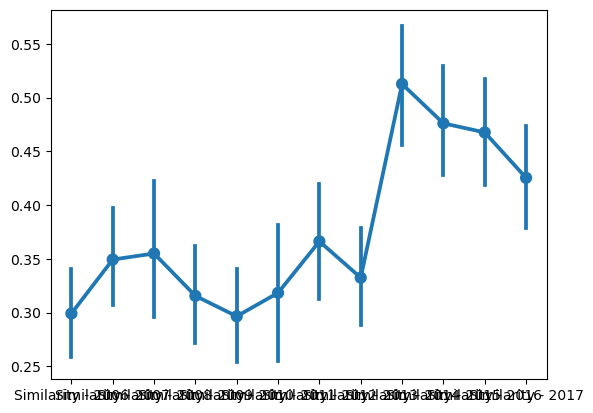

In [152]:
plot_similarity_evolution(mean_global_similarity_ratings)

In [172]:
loc = breweries['location'].unique()

In [173]:
brewery_latitudes_longitudes = []
my_map = folium.Map(location = [20, 0], zoom_start = 3)

for location in loc:
    try:
        res = geocode_location(location)
    except:
        continue
    if res:
        lat,long = res
        brewery_latitudes_longitudes.append([lat, long])



In [183]:
ll_dict = dict(zip(loc, brewery_latitudes_longitudes))

In [198]:
brewery_similarity_popularity = compute_similarity_countries(bc_popularities_by_year, jaccard_flag = False)

/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

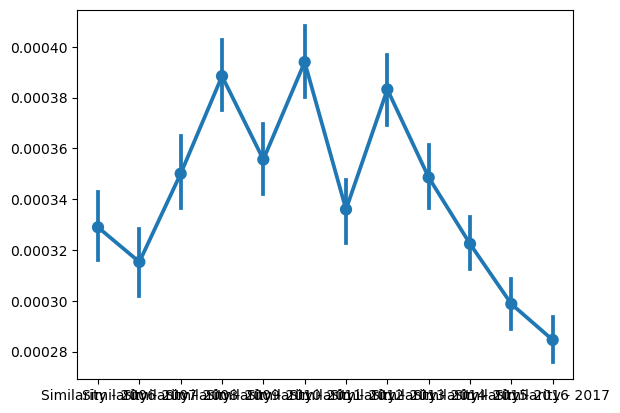

In [199]:
plot_similarity_evolution(brewery_similarity_popularity)

In [206]:
brewery_similarity_ratings=compute_similarity_countries(bc_ratings_by_year, jaccard_flag = False)

/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

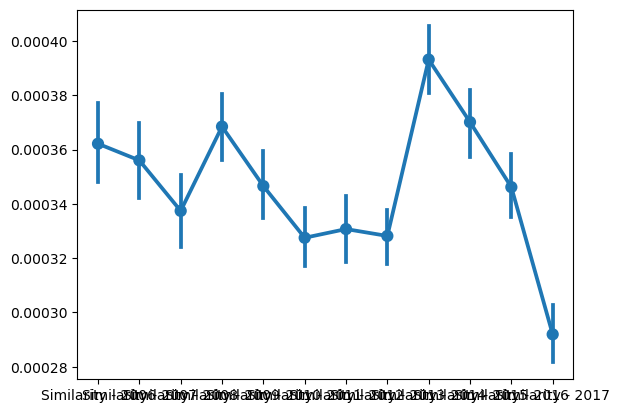

In [207]:
plot_similarity_evolution(brewery_similarity_ratings)

In [211]:
all_years_list = sorted(ratings['year'].unique())
countries = bc_ratings_by_year.index.tolist()
brewery_similarity_to_global_pop = pd.DataFrame()
for year in all_years_list:
    jaccard_similarities = []
    brewery_pop = bc_ratings_by_year[str(year)]
    global_pop = global_brewery_popularities_by_year.loc[str(year)][0][0]
    for i in range(len(brewery_pop)):
        
        distance = geodesic(ll_dict[brewery_pop.iloc[i]], ll_dict[global_pop]).kilometers
            
        jaccard_similarities.append((countries[i], 1/(distance+1)))

    df_jaccard = pd.DataFrame(jaccard_similarities, columns=['Country 1',  'Similarity - ' + str(year)])
    brewery_similarity_to_global_pop=pd.concat([brewery_similarity_to_global_pop, df_jaccard], axis=1)

brewery_similarity_to_global_pop

/var/folders/j6/rzgm__cn4mz7qr7w0g71wb9w0000gn/T/ipykernel_918/4162818591.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  global_pop = global_brewery_popularities_by_year.loc[str(year)][0][0]
/var/folders/j6/rzgm__cn4mz7qr7w0g71wb9w0000gn/T/ipykernel_918/4162818591.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  global_pop = global_brewery_popularities_by_year.loc[str(year)][0][0]
/var/folders/j6/rzgm__cn4mz7qr7w0g71wb9w0000gn/T/ipykernel_918/4162818591.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consiste

,Country 1,Similarity - 2006,Country 1,Similarity - 2007,Country 1,Similarity - 2008,Country 1,Similarity - 2009,Country 1,Similarity - 2010,...,Country 1,Similarity - 2013,Country 1,Similarity - 2014,Country 1,Similarity - 2015,Country 1,Similarity - 2016,Country 1,Similarity - 2017
0,Australia,0.000073,Australia,0.000118,Australia,0.000090,Australia,0.000148,Australia,0.000070,...,Australia,0.000070,Australia,0.000116,Australia,0.000674,Australia,0.000062,Australia,0.000090
1,Belgium,0.000073,Belgium,0.000189,Belgium,0.000107,Belgium,0.000134,Belgium,0.000073,...,Belgium,0.000116,Belgium,0.000073,Belgium,0.000189,Belgium,0.000084,Belgium,0.000105
2,Brazil,0.000089,Brazil,0.000164,Brazil,0.000091,Brazil,0.000089,Brazil,1.000000,...,Brazil,0.000081,Brazil,0.000074,Brazil,0.000428,Brazil,0.000074,Brazil,0.000090
3,Canada,0.000077,Canada,0.000148,Canada,0.000085,Canada,0.000148,Canada,0.000070,...,Canada,0.000073,Canada,0.000116,Canada,0.000261,Canada,0.000073,Canada,0.000072
4,Croatia,1.000000,Croatia,0.000089,Croatia,0.000371,Croatia,0.000108,Croatia,0.000091,...,Croatia,0.000091,Croatia,0.000070,Croatia,0.000674,Croatia,0.000070,Croatia,0.000090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,"United States, Virginia",0.000075,"United States, Virginia",0.000151,"United States, Virginia",0.000085,"United States, Virginia",0.000148,"United States, Virginia",0.000071,...,"United States, Virginia",0.000073,"United States, Virginia",0.000073,"United States, Virginia",0.000674,"United States, Virginia",0.000073,"United States, Virginia",0.000072
67,"United States, Washington",0.000075,"United States, Washington",0.000148,"United States, Washington",0.000085,"United States, Washington",0.000148,"United States, Washington",0.000081,...,"United States, Washington",0.000073,"United States, Washington",0.000073,"United States, Washington",0.000189,"United States, Washington",0.000073,"United States, Washington",0.000096
68,"United States, West Virginia",0.000083,"United States, West Virginia",0.000089,"United States, West Virginia",0.000107,"United States, West Virginia",0.000089,"United States, West Virginia",1.000000,...,"United States, West Virginia",1.000000,"United States, West Virginia",1.000000,"United States, West Virginia",0.000436,"United States, West Virginia",1.000000,"United States, West Virginia",0.000090
69,"United States, Wisconsin",0.000080,"United States, Wisconsin",0.000148,"United States, Wisconsin",0.000085,"United States, Wisconsin",0.000137,"United States, Wisconsin",0.000070,...,"United States, Wisconsin",0.000073,"United States, Wisconsin",0.000073,"United States, Wisconsin",0.000806,"United States, Wisconsin",0.000073,"United States, Wisconsin",0.000090


/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

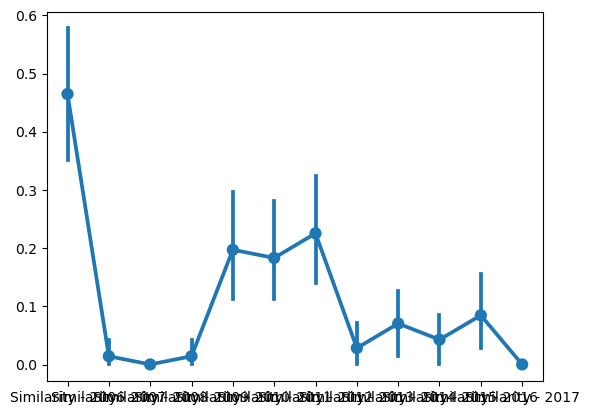

In [213]:
plot_similarity_evolution(brewery_similarity_to_global_pop)

In [214]:
all_years_list = sorted(ratings['year'].unique())
countries = bc_ratings_by_year.index.tolist()
brewery_similarity_to_global_ratings = pd.DataFrame()
for year in all_years_list:
    jaccard_similarities = []
    brewery_pop = bc_ratings_by_year[str(year)]
    global_pop = global_brewery_highest_rated_by_year.loc[str(year)][0][0]
    for i in range(len(brewery_pop)):
        
        distance = geodesic(ll_dict[brewery_pop.iloc[i]], ll_dict[global_pop]).kilometers
            
        jaccard_similarities.append((countries[i], 1/(distance+1)))

    df_jaccard = pd.DataFrame(jaccard_similarities, columns=['Country 1',  'Similarity - ' + str(year)])
    brewery_similarity_to_global_ratings=pd.concat([brewery_similarity_to_global_ratings, df_jaccard], axis=1)

brewery_similarity_to_global_ratings

/var/folders/j6/rzgm__cn4mz7qr7w0g71wb9w0000gn/T/ipykernel_918/874559331.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  global_pop = global_brewery_highest_rated_by_year.loc[str(year)][0][0]
/var/folders/j6/rzgm__cn4mz7qr7w0g71wb9w0000gn/T/ipykernel_918/874559331.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  global_pop = global_brewery_highest_rated_by_year.loc[str(year)][0][0]
/var/folders/j6/rzgm__cn4mz7qr7w0g71wb9w0000gn/T/ipykernel_918/874559331.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

,Country 1,Similarity - 2006,Country 1,Similarity - 2007,Country 1,Similarity - 2008,Country 1,Similarity - 2009,Country 1,Similarity - 2010,...,Country 1,Similarity - 2013,Country 1,Similarity - 2014,Country 1,Similarity - 2015,Country 1,Similarity - 2016,Country 1,Similarity - 2017
0,Australia,0.000073,Australia,0.000082,Australia,0.000073,Australia,0.000674,Australia,0.000674,...,Australia,0.000674,Australia,0.000189,Australia,0.000396,Australia,1.000000,Australia,0.000278
1,Belgium,0.000073,Belgium,0.000073,Belgium,0.000086,Belgium,0.000457,Belgium,0.009934,...,Belgium,0.000189,Belgium,0.000806,Belgium,0.000127,Belgium,0.000233,Belgium,0.000222
2,Brazil,0.000089,Brazil,0.000094,Brazil,0.000073,Brazil,0.000073,Brazil,0.000073,...,Brazil,0.000436,Brazil,0.002223,Brazil,0.000321,Brazil,0.000234,Brazil,0.000278
3,Canada,0.000077,Canada,0.000070,Canada,0.000070,Canada,0.000674,Canada,0.000674,...,Canada,0.000806,Canada,0.000189,Canada,1.000000,Canada,0.000322,Canada,1.000000
4,Croatia,1.000000,Croatia,1.000000,Croatia,1.000000,Croatia,0.000091,Croatia,0.000191,...,Croatia,0.000191,Croatia,0.000674,Croatia,0.000396,Croatia,0.000396,Croatia,0.000268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,"United States, Virginia",0.000075,"United States, Virginia",0.000075,"United States, Virginia",0.000070,"United States, Virginia",0.000674,"United States, Virginia",0.001041,...,"United States, Virginia",0.000806,"United States, Virginia",0.000806,"United States, Virginia",0.000396,"United States, Virginia",0.000300,"United States, Virginia",1.000000
67,"United States, Washington",0.000075,"United States, Washington",0.000070,"United States, Washington",0.000070,"United States, Washington",0.000674,"United States, Washington",0.000436,...,"United States, Washington",0.000806,"United States, Washington",0.000806,"United States, Washington",0.000127,"United States, Washington",0.000322,"United States, Washington",0.000281
68,"United States, West Virginia",0.000083,"United States, West Virginia",1.000000,"United States, West Virginia",0.000086,"United States, West Virginia",0.000073,"United States, West Virginia",0.000073,...,"United States, West Virginia",0.000073,"United States, West Virginia",0.000073,"United States, West Virginia",0.000239,"United States, West Virginia",0.000062,"United States, West Virginia",0.000268
69,"United States, Wisconsin",0.000080,"United States, Wisconsin",0.000070,"United States, Wisconsin",0.000070,"United States, Wisconsin",0.000436,"United States, Wisconsin",0.000674,...,"United States, Wisconsin",0.000806,"United States, Wisconsin",0.000806,"United States, Wisconsin",0.000322,"United States, Wisconsin",0.000322,"United States, Wisconsin",0.000322


/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

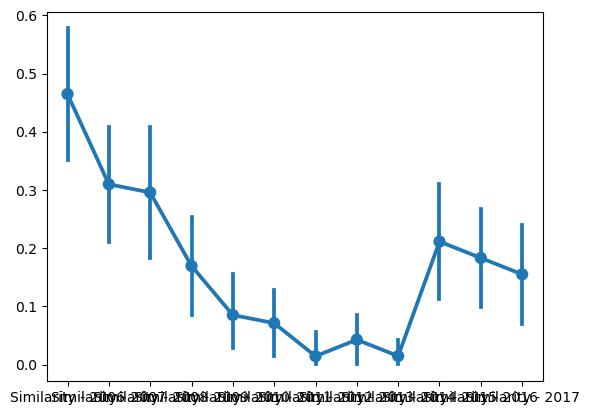

In [216]:
plot_similarity_evolution(brewery_similarity_to_global_ratings)

SAME THING WITH GROUPING

In [61]:
us_state_populations = pd.read_csv('dataset/AdditionalData/US_state_populations.csv')
world_population = pd.read_csv("dataset/AdditionalData/world_population.csv")

#Contacenating the two datasets into one and creating a location-population dictionary:

us_state_populations.rename(columns = {'states': 'location'}, inplace = True)
populations_by_location = pd.concat([us_state_populations, world_population], ignore_index = True)
populations_by_location_dict = dict(zip(populations_by_location['location'], populations_by_location['2010']))

#Finding the portion (as percentage) of population for each location that are users in either of the websites. Then, we print the list of locations that are not present in the additional datasets. We see that all the locations are very small countries, so that exclusion of them will not be significant for our future analysis.

num_users_by_location = users['location'].value_counts().reset_index()
percentage_users_by_location = []
missing_locations = []
for index, row in num_users_by_location.iterrows():
    location = row['location']
    if location in populations_by_location_dict:
        percentage_users_by_location.append({'location': location, 'percentage': 100 * row['count'] / populations_by_location_dict[location], 'population': populations_by_location_dict[location], 'users': row['count']})
    else:
        missing_locations.append(location)

percentage_users_by_location = pd.DataFrame(percentage_users_by_location)

# Gets the percentage users by location


In [62]:
# Gets the latitude and longitude for each of our final locations in degrees
from geopy.geocoders import Nominatim
print(len(percentage_users_by_location['location'].tolist()))
latitudes_longitudes = {}
geolocator = Nominatim(user_agent="my_geocoder")
for location in percentage_users_by_location['location'].tolist():
    geocode_location = geolocator.geocode(location)
    if geocode_location:
        latitudes_longitudes[location] = (geocode_location.latitude, geocode_location.longitude)



71


In [63]:
import math

# Function taken from GeeksForGeeks
def haversine(lat1, lon1, lat2, lon2):
     
    
    dLat = (lat2 - lat1) * math.pi / 180.0 # Get distance between each of the lats and longs and convert to radians
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formula
    a = (pow(math.sin(dLat / 2), 2) + pow(math.sin(dLon / 2), 2) * math.cos(lat1) * math.cos(lat2));
    RADIUS = 6371 # Approximate radius of the earth in kilometers
    c = 2 * math.asin(math.sqrt(a))
    return RADIUS * c

In [64]:
# Create a dictionary and dataframe of the distances between any two locations
location_distances_dict = {}
for first_location in latitudes_longitudes:
    location_distances_dict[first_location] = {}
    for second_location in latitudes_longitudes:
        if first_location == second_location:
            location_distances_dict[first_location][second_location] = 0
        if first_location != second_location:
            location_distances_dict[first_location][second_location] = haversine(latitudes_longitudes[first_location][0], latitudes_longitudes[first_location][1], latitudes_longitudes[second_location][0], latitudes_longitudes[second_location][1])

location_df = pd.DataFrame(location_distances_dict)
location_df

,"United States, California","United States, Pennsylvania","United States, New York","United States, Illinois","United States, Massachusetts","United States, Texas",Canada,"United States, Ohio","United States, Florida","United States, Michigan",...,"United States, Idaho","United States, Montana","United States, Alaska","United States, Hawaii","United States, North Dakota",Croatia,"United States, Wyoming",Northern Ireland,Iceland,Luxembourg
"United States, California",0.000000,3552.326937,3866.530542,2571.153846,4004.951531,1954.634315,2812.838572,3142.853522,3621.002712,2973.162506,...,870.428190,1403.352094,3702.099324,4032.957678,1922.491698,9809.535181,1192.887907,7968.884605,6825.690648,8996.221170
"United States, Pennsylvania",3552.326937,0.000000,314.369078,993.585872,498.189881,2150.884632,3025.700794,426.837717,1508.313085,643.204125,...,2974.961765,2622.285872,5134.699500,7583.233908,1951.333105,7138.588192,2462.128103,5256.793895,4550.129771,6283.974104
"United States, New York",3866.530542,314.369078,0.000000,1306.692620,247.576832,2433.926491,3220.710307,736.134907,1593.888355,936.620365,...,3280.879398,2915.022482,5335.381819,7897.019052,2238.177769,6909.851327,2770.694878,5041.720210,4400.658672,6058.185004
"United States, Illinois",2571.153846,993.585872,1306.692620,0.000000,1474.793721,1278.479719,2655.051895,573.396291,1553.439906,556.547317,...,2065.923217,1807.634735,4655.709614,6604.023708,1220.976690,7944.368427,1542.704390,6043.701727,5182.091791,7088.360485
"United States, Massachusetts",4004.951531,498.189881,247.576832,1474.793721,0.000000,2648.404725,3164.284000,921.058727,1835.719781,1036.934358,...,3379.745456,2984.625316,5275.993126,8025.753028,2301.717359,6667.541498,2879.906976,4796.463884,4155.345062,5815.078240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Croatia,9809.535181,7138.588192,6909.851327,7944.368427,6667.541498,9221.280638,7144.271882,7512.481458,8369.207604,7388.272921,...,8941.350196,8406.298231,7737.615519,12735.801456,7955.243341,0.000000,8685.090899,1901.909478,2990.526292,856.532972
"United States, Wyoming",1192.887907,2462.128103,2770.694878,1542.704390,2879.906976,1544.122668,1990.217949,2083.570878,2899.720603,1843.953268,...,523.322368,494.818458,3527.162354,5152.239161,738.358360,8685.090899,0.000000,6819.513340,5723.585890,7857.088851
Northern Ireland,7968.884605,5256.793895,5041.720210,6043.701727,4796.463884,7321.337309,5418.487290,5621.109484,6549.234384,5487.378655,...,7108.492110,6571.668023,6400.770662,11238.541541,6084.188573,1901.909478,6819.513340,0.000000,1309.384846,1048.906167
Iceland,6825.690648,4550.129771,4400.658672,5182.091791,4155.345062,6446.226737,4168.367187,4851.601963,5988.399710,4634.700053,...,5955.966443,5422.670297,5098.639920,9937.407490,5005.437309,2990.526292,5723.585890,1309.384846,0.000000,2216.835411


In [65]:
# Gets the five closest nearest locations for each location and the five furthest and stored in the dictionary
five_closest_locs = {}
five_farthest_locs = {}

for location in location_distances_dict:
    sorted_locations_by_distance = sorted(location_distances_dict[location].items(), key=lambda x:x[1])
    five_closest_locs[location] = sorted_locations_by_distance[1: 6]
    five_farthest_locs[location] = sorted_locations_by_distance[len(location_distances_dict) - 5 : len(location_distances_dict) ]
print(five_farthest_locs)
print(five_closest_locs)

{'United States, California': [('Poland', 9318.707523175612), ('Croatia', 9809.535181078592), ('Italy', 9914.873324007076), ('New Zealand', 11128.5875787469), ('Australia', 13031.883651960294)], 'United States, Pennsylvania': [('Italy', 7103.308940420564), ('Croatia', 7138.588191881768), ('United States, Hawaii', 7583.233907664657), ('New Zealand', 14289.608714493581), ('Australia', 16517.693140708885)], 'United States, New York': [('Italy', 6860.531870883095), ('Croatia', 6909.851327158158), ('United States, Hawaii', 7897.019052269386), ('New Zealand', 14561.6349722495), ('Australia', 16817.394454154168)], 'United States, Illinois': [('Poland', 7664.229381280188), ('Croatia', 7944.368426628416), ('Italy', 7945.3679179421815), ('New Zealand', 13370.852866960606), ('Australia', 15586.394660469059)], 'United States, Massachusetts': [('Italy', 6622.2898580124265), ('Croatia', 6667.541497679188), ('United States, Hawaii', 8025.753027600149), ('New Zealand', 14785.524504377374), ('Australia

In [217]:
def get_group_similarities(df_ranking, five_closest_locs, five_farthest_locs, jaccard_flag = True): 
    all_years_list = sorted(ratings['year'].unique())
    countries = df_ranking.index.tolist()
    closest_sim_tot = pd.DataFrame()
    farthest_sim_tot = pd.DataFrame()
    for year in all_years_list:
        df_ranking_year = df_ranking[str(year)]
        closest_sim = []
        farthest_sim = []
        for i in range(len(df_ranking_year)):
            
            five_closest = five_closest_locs[countries[i]]
            five_farthest= five_farthest_locs[countries[i]]
            
            for loc in (five_closest) : 
                distance = jaccard(df_ranking_year.iloc[i],df_ranking_year[loc[0]])
                closest_sim.append(distance)
            
            for loc in (five_farthest) : 
                distance = jaccard(df_ranking_year.iloc[i],df_ranking_year[loc[0]])
                farthest_sim.append(distance)

        df_closer= pd.DataFrame(closest_sim, columns=['Similarity Close - ' + str(year)])
        df_farthest= pd.DataFrame(farthest_sim, columns=['Similarity Far - ' + str(year)])
        
        closest_sim_tot=pd.concat([closest_sim_tot, df_closer], axis=1)
        farthest_sim_tot = pd.concat([farthest_sim_tot, df_farthest], axis=1)
    return closest_sim_tot, farthest_sim_tot

In [228]:
closest_style_ratings, farthest_style_ratings = get_group_similarities(style_ratings_by_year, five_closest_locs, five_farthest_locs, jaccard_flag = True)

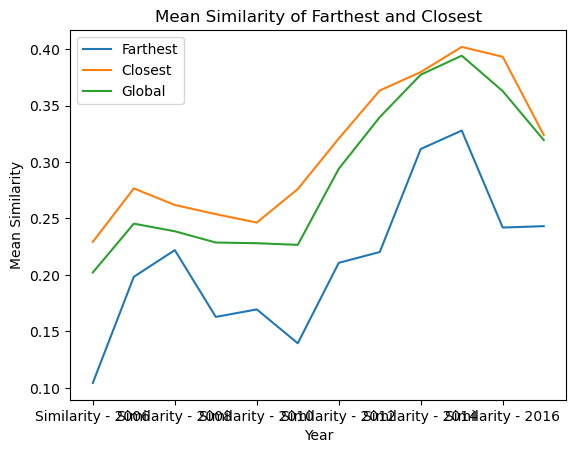

In [231]:
sim_col= [col for col in style_similarity_ratings.columns if col.startswith('Similarity')]
farthest_style_ratings.mean().plot(label='Farthest')
closest_style_ratings.mean().plot(label='Closest')
style_similarity_ratings[sim_col].mean().plot(label='Global')

plt.xlabel('Year')
plt.ylabel('Mean Similarity')
plt.title('Mean Similarity of Farthest and Closest')
plt.legend()
plt.show()


In [232]:
all_years_list = sorted(ratings['year'].unique())
countries = style_popularities_by_year.index.tolist()
style_similarity = pd.DataFrame()
closest_sim_tot = pd.DataFrame()
farthest_sim_tot = pd.DataFrame()
for year in all_years_list:
    jaccard_similarities = []
    style_ratings = style_popularities_by_year[str(year)]
    closest_sim = []
    farthest_sim = []
    for i in range(len(style_ratings)):
        five_closest = five_closest_locs[countries[i]]
        five_farthest= five_farthest_locs[countries[i]]
        
        for loc in (five_closest) : 
            distance = jaccard(style_ratings.iloc[i],style_ratings[loc[0]])
            closest_sim.append(distance)
        
        for loc in (five_farthest) : 
            distance = jaccard(style_ratings.iloc[i],style_ratings[loc[0]])
            farthest_sim.append(distance)

    df_closer= pd.DataFrame(closest_sim, columns=['Similarity Close - ' + str(year)])
    df_farthest= pd.DataFrame(farthest_sim, columns=['Similarity Far - ' + str(year)])
    
    closest_sim_tot=pd.concat([closest_sim_tot, df_closer], axis=1)
    farthest_sim_tot = pd.concat([farthest_sim_tot, df_farthest], axis=1)
    #style_similarity=pd.concat([style_similarity, df_jaccard], axis=1)

#style_similarity = style_similarity.T.drop_duplicates().T


In [237]:
closest_style_pop, farthest_style_pop = get_group_similarities(style_popularities_by_year, five_closest_locs, five_farthest_locs, jaccard_flag = True)

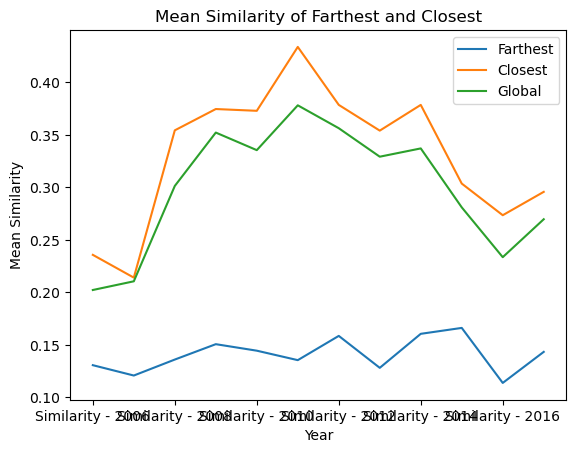

In [238]:
sim_col= [col for col in style_similarity_popularity.columns if col.startswith('Similarity')]

farthest_sim_tot.mean().plot(label='Farthest')
closest_sim_tot.mean().plot(label='Closest')
style_similarity_popularity[sim_col].mean().plot(label='Global')

plt.xlabel('Year')
plt.ylabel('Mean Similarity')
plt.title('Mean Similarity of Farthest and Closest')
plt.legend()
plt.show()


#Pair wise
#Use different # of closest countries?

In [241]:
closest_and_furthest_distance = pd.read_csv('dataset/AdditionalData/Wealth_and_Lang.csv')

wealth_dict = {}
for index, row in closest_and_furthest_distance.iterrows():
    wealth_dict[row['Location']] = row['Money in 2008']

wealth_differences_dict = {}
for first_location in wealth_dict:
    wealth_differences_dict[first_location] = {}
    for second_location in wealth_dict:
        wealth_differences_dict[first_location][second_location] = abs(wealth_dict[first_location] - wealth_dict[second_location])

wealth_differences_df = pd.DataFrame(wealth_differences_dict)

five_closest_locs = {}
five_farthest_locs = {}

for location in wealth_differences_dict:
    sorted_locations_by_distance = sorted(wealth_differences_dict[location].items(), key=lambda x:x[1])
    five_closest_locs[location] = sorted_locations_by_distance[1: 6]
    five_farthest_locs[location] = sorted_locations_by_distance[len(wealth_differences_dict) - 5 : len(wealth_differences_dict) ]
five_closest_locs

{'United States, California': [('Sweden', 234.59999999999854),
  ('United States, Maryland', 877.0559999999969),
  ('United States, Washington', 968.7320000000036),
  ('Iceland', 1025.4000000000015),
  ('United States, Illinois', 1516.1399999999994)],
 'United States, Pennsylvania': [('United States, New Hampshire',
   98.23200000000361),
  ('United States, Iowa', 308.5060000000012),
  ('Belgium', 403.59999999999854),
  ('United States, Kansas', 504.47699999999895),
  ('United States, North Carolina', 690.1100000000006)],
 'United States, New York': [('Netherlands', 797.0999999999985),
  ('Iceland', 1733.5999999999985),
  ('United States, Washington', 1790.2679999999964),
  ('Sweden', 2524.4000000000015),
  ('United States, New Jersey', 2527.5290000000023)],
 'United States, Illinois': [('United States, Colorado', 10.362999999997555),
  ('United States, Virginia', 94.80099999999948),
  ('United States, Minnesota', 305.64800000000105),
  ('Finland', 629.0599999999977),
  ('United States

In [248]:
wealth_style_ratings_close, wealth_style_ratings_far = get_group_similarities(style_ratings_by_year, five_closest_locs, five_farthest_locs, jaccard_flag = True)

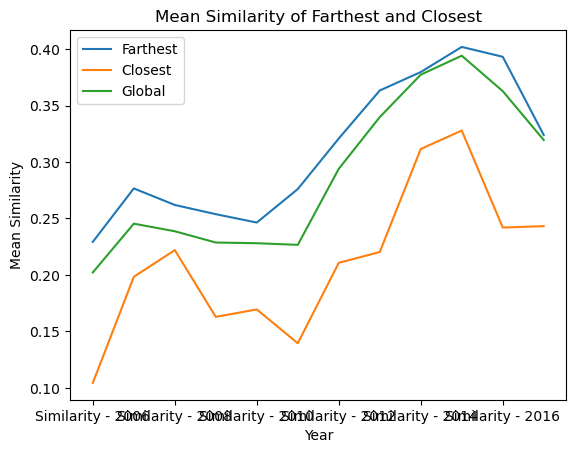

In [249]:

wealth_style_ratings_close.mean().plot(label='Farthest')
wealth_style_ratings_far.mean().plot(label='Closest')
style_similarity_ratings[sim_col].mean().plot(label='Global')

plt.xlabel('Year')
plt.ylabel('Mean Similarity')
plt.title('Mean Similarity of Farthest and Closest')
plt.legend()
plt.show()

In [160]:
#Do some test t test

from scipy import stats
stats.ttest_ind(total_close, total_far)


TtestResult(statistic=20.007638178998548, pvalue=4.6247746613695515e-87, df=8518.0)

In [161]:
for year in all_years_list:
    print(year)
    print(stats.ttest_ind(closest_sim_tot['Similarity Close - ' + str(year)], farthest_sim_tot['Similarity Far - ' + str(year)]))

2006
TtestResult(statistic=7.581041967345247, pvalue=1.0777788246402279e-13, df=708.0)
2007
TtestResult(statistic=4.679421866309697, pvalue=3.4472041910924226e-06, df=708.0)
2008
TtestResult(statistic=2.619408073851199, pvalue=0.008996867812637723, df=708.0)
2009
TtestResult(statistic=6.393414546238881, pvalue=2.9440203919939166e-10, df=708.0)
2010
TtestResult(statistic=5.495544586494359, pvalue=5.438546234551554e-08, df=708.0)
2011
TtestResult(statistic=8.309702413982686, pvalue=4.886075090043774e-16, df=708.0)
2012
TtestResult(statistic=6.385797027072584, pvalue=3.085983296322344e-10, df=708.0)
2013
TtestResult(statistic=9.120226882615324, pvalue=7.646156186192727e-19, df=708.0)
2014
TtestResult(statistic=4.256259243430922, pvalue=2.3586817231210073e-05, df=708.0)
2015
TtestResult(statistic=4.1044582021486935, pvalue=4.5246524373984345e-05, df=708.0)
2016
TtestResult(statistic=9.878329391636733, pvalue=1.201842248241154e-21, df=708.0)
2017
TtestResult(statistic=4.058035673116901, pva

In [180]:
#Splitting in groups?

def k_closest_and_farthest_locations(k, all_differences_dict): # returns the k closest locations to the current location and the k furthest locations to the current location
    k_closest_locs = {}
    k_farthest_locs = {}
    for location in all_differences_dict:
        sorted_locations_by_distance = sorted(all_differences_dict[location].items(), key=lambda x:x[1])
        k_closest_locs[location] = sorted_locations_by_distance[1: k + 1]
        k_farthest_locs[location] = sorted_locations_by_distance[len(location_distances_dict) - k : len(location_distances_dict) ]
    return k_closest_locs, k_farthest_locs